# Filtrado clásico


## Ejemplo de diseño

Diseñe un circuito pasa bajos adaptado en generador y en carga a 50$$\Omega$$ y frecuencia de corte normalizada de 1 $$\frac{rad}{s}$$. Utilice una celda T.

### Diseño celda k-constante

<img src="filtrado_clasico/kconstante.png" />

$$Z_{0T} = \sqrt{\frac{L}{C}}\sqrt{1 - \frac{4w^2}{LC}}$$

$$Z_{0} = \sqrt{\frac{L}{C}} $$

$$w_{C}^2 = \frac{4}{LC} $$

### Diseño celda m-derivado

<img src="filtrado_clasico/celda_m_derivada.png" />

$$ L_{p} = m L $$

$$ C_{p} = m C $$

$$ L_{2} = L \frac{1-m^2}{4m} $$

$$ m \in (0;1) $$

$$w_{m}^2 = \frac{4}{LC(1-m^2)}$$

## Calculadora

In [19]:
import numpy as np
import matplotlib.pyplot as plt

### Celda k-constante

In [1]:
Z_0 = 50 # ohm
w_c = 1  # rad/s

L = 2 * Z_0 / w_c
C = 2 / (Z_0 * w_c)

In [2]:
print('L: {}'.format(L))
print('C: {}'.format(C))

L: 100.0
C: 0.04


### Celda m-derivada

In [5]:
w_m = 1.1 * w_c

m = np.sqrt(1 - (w_c**2) / (w_m**2))

In [6]:
print('m: {}'.format(m))

m: 0.416597790450531


In [8]:
L_p = m * L
C_p = m * C
L_2 = L * (1 - m**2) / (4 * m)

In [9]:
print('L_p: {}'.format(L_p))
print('C_p: {}'.format(C_p))
print('L_2: {}'.format(L_2))

L_p: 41.6597790450531
C_p: 0.016663911618021242
L_2: 49.59497505363461


### Celda m-derivada de adaptacion

In [11]:
m = 0.6

In [12]:
L_p = m * L
C_p = m * C
L_2 = L * (1 - m**2) / (4 * m)

In [14]:
w_m = w_c / np.sqrt(1 - m**2)

In [15]:
print('L_p / 2: {}'.format(L_p / 2))
print('C_p / 2: {}'.format(C_p / 2))
print('2* L_2: {}'.format(L_2 * 2))
print('w_m: {}'.format(w_m))

L_p / 2: 30.0
C_p / 2: 0.012
2* L_2: 53.333333333333336
w_m: 1.25


In [16]:
w_m / 2 / np.pi

0.1989436788648692

## Graficas

In [41]:
# Parte real
def z_ot_real_lp(l, c, w):
    return np.sqrt(l/c - ((w * L)**2) / 4)

In [42]:
w = np.linspace(0, w_c, 100, endpoint=True)

In [63]:
Z_ot = [z_ot_real_lp(L, C, w_i) for w_i in w]

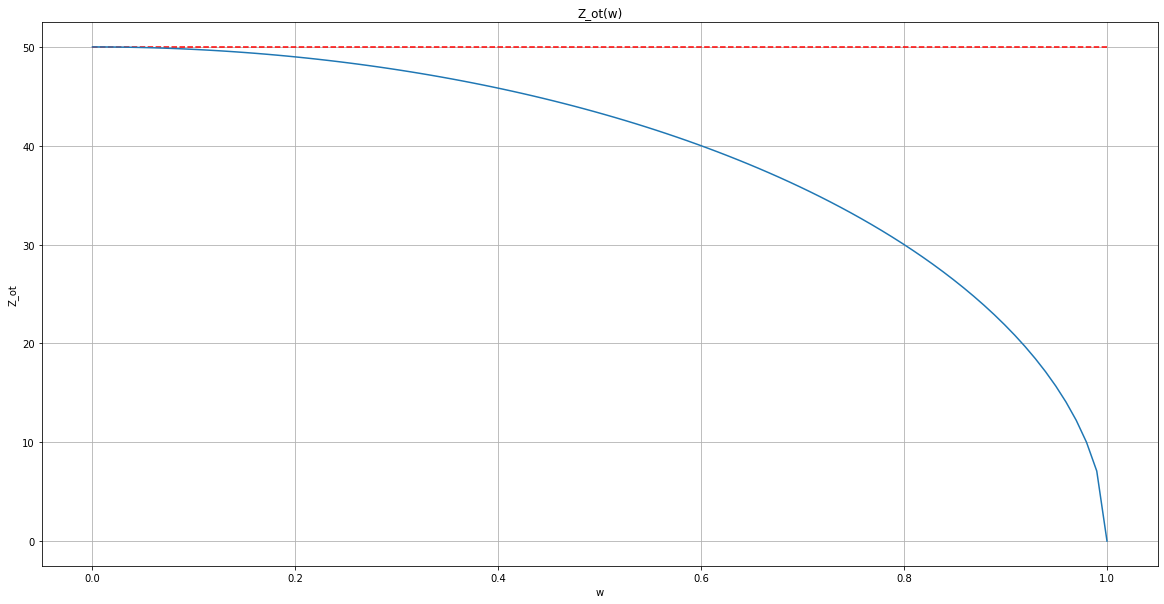

In [64]:
fig = plt.figure(figsize=(20,10))
plt.plot(w, Z_ot)
plt.grid()
plt.title('Z_ot(w)')
plt.ylabel('Z_ot')
plt.xlabel('w')
plt.hlines(Z_0, np.min(w), np.max(w), colors='r', linestyles='dashed')

In [65]:
def z_opi_n(l, c, w, m=1):
    return np.sqrt( (l / (4*c)) * (4- (1-m**2)*l*c* (w**2))**2 / (4-l*c*(w**2)))

In [66]:
m = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
Z_ot = dict({})
for m_i in m:
    Z_ot[m_i] = [z_opi_n(L, C, w_i, m=m_i) for w_i in w]
    for i in range(0, len(Z_ot[m_i])):
        Z_ot[m_i][i] = Z_ot[m_i][i] if not np.isnan(Z_ot[m_i][i]) else 0

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


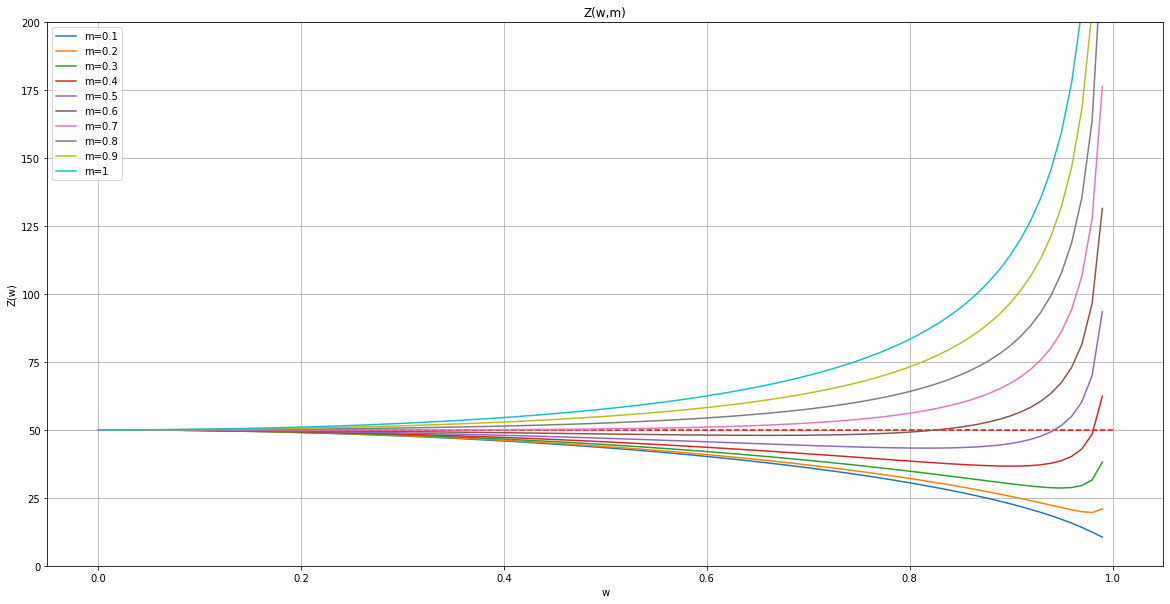

In [69]:
fig = plt.figure(figsize=(20,10))
for m_i, z_i in Z_ot.items():
    plt.plot(w, z_i, label='m={}'.format(m_i))
plt.grid()
plt.title('Z(w,m)')
plt.ylabel('Z(w)')
plt.xlabel('w')
plt.hlines(Z_0, np.min(w), np.max(w), colors='r', linestyles='dashed')
plt.ylim([0, 200])
plt.legend()

No handles with labels found to put in legend.


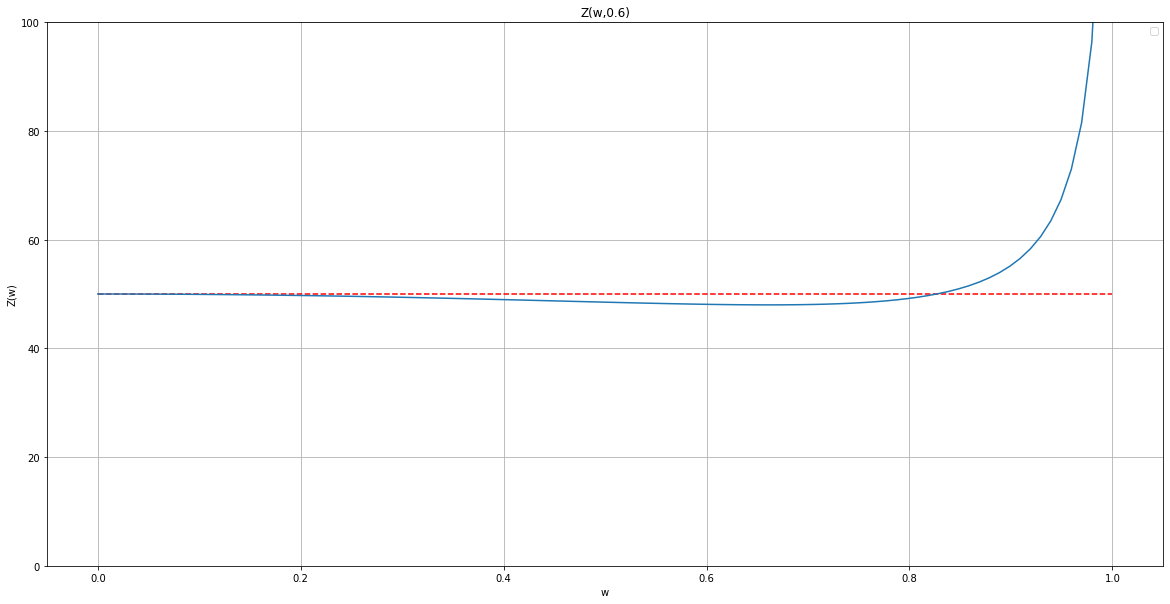

In [68]:
fig = plt.figure(figsize=(20,10))
plt.plot(w, Z_ot[0.6])
plt.grid()
plt.title('Z(w,0.6)')
plt.ylabel('Z(w)')
plt.xlabel('w')
plt.ylim([0,100])
plt.hlines(Z_0, np.min(w), np.max(w), colors='r', linestyles='dashed')
plt.legend()

## Circuito final

<img src='filtrado_clasico/circuito.png' />

<img src='filtrado_clasico/transferencia.png' />